In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Setting the seaborn palette and style
sns.set_palette("Set2", 8)
sns.set_style('whitegrid')

In [3]:
# Load the dataset
dataframe = pd.read_csv('/content/titanic.csv')

In [4]:
# Display the dataframe
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


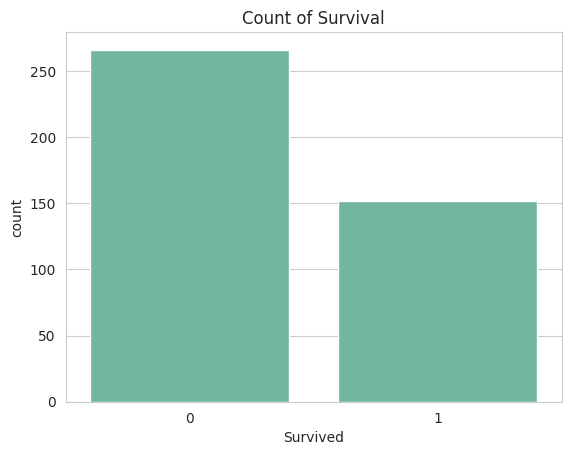

In [5]:
# Plotting counts of survival
sns.countplot(x='Survived', data=dataframe)
plt.title('Count of Survival')
plt.show()

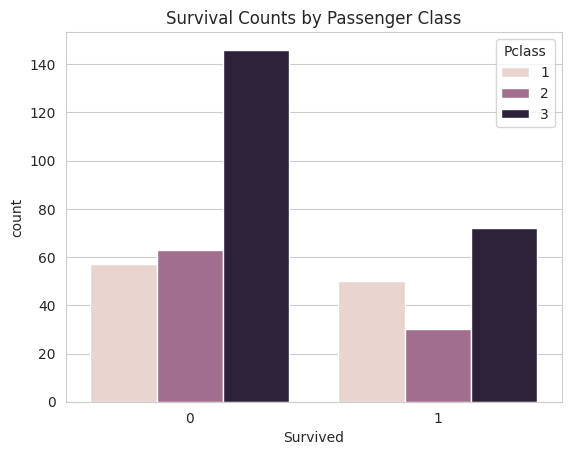

In [6]:
# Plotting counts of survival based on passenger class
sns.countplot(x='Survived', hue='Pclass', data=dataframe)
plt.title('Survival Counts by Passenger Class')
plt.show()


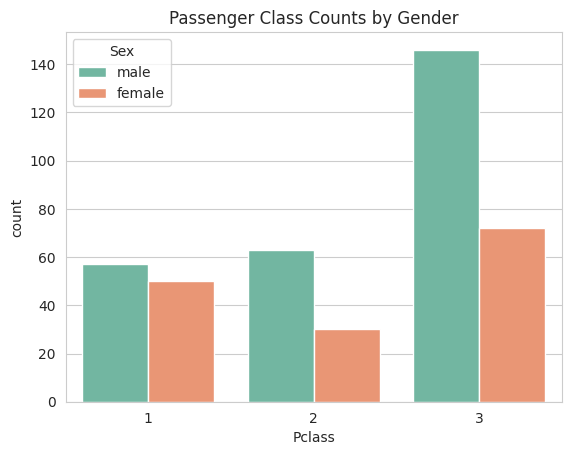

In [7]:
# Plotting passenger class counts based on gender
sns.countplot(x='Pclass', hue='Sex', data=dataframe)
plt.title('Passenger Class Counts by Gender')
plt.show()


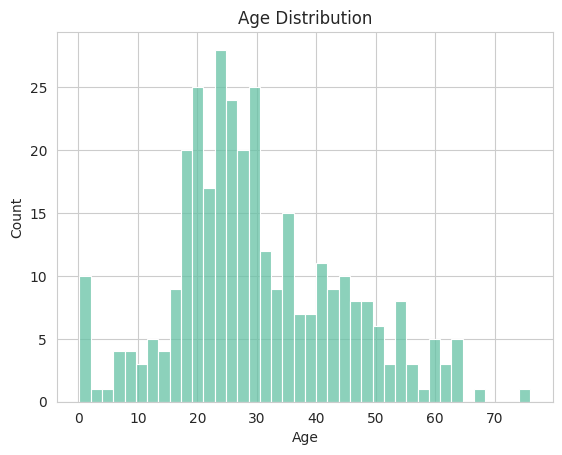

In [8]:
# Plotting the distribution of age
sns.histplot(dataframe['Age'].dropna(), bins=40, kde=False)
plt.title('Age Distribution')
plt.show()


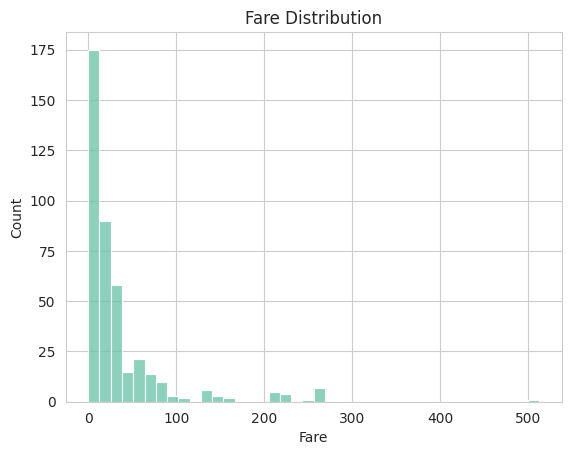

In [9]:
# Plotting the distribution of fare
sns.histplot(dataframe['Fare'], bins=40, kde=False)
plt.title('Fare Distribution')
plt.show()

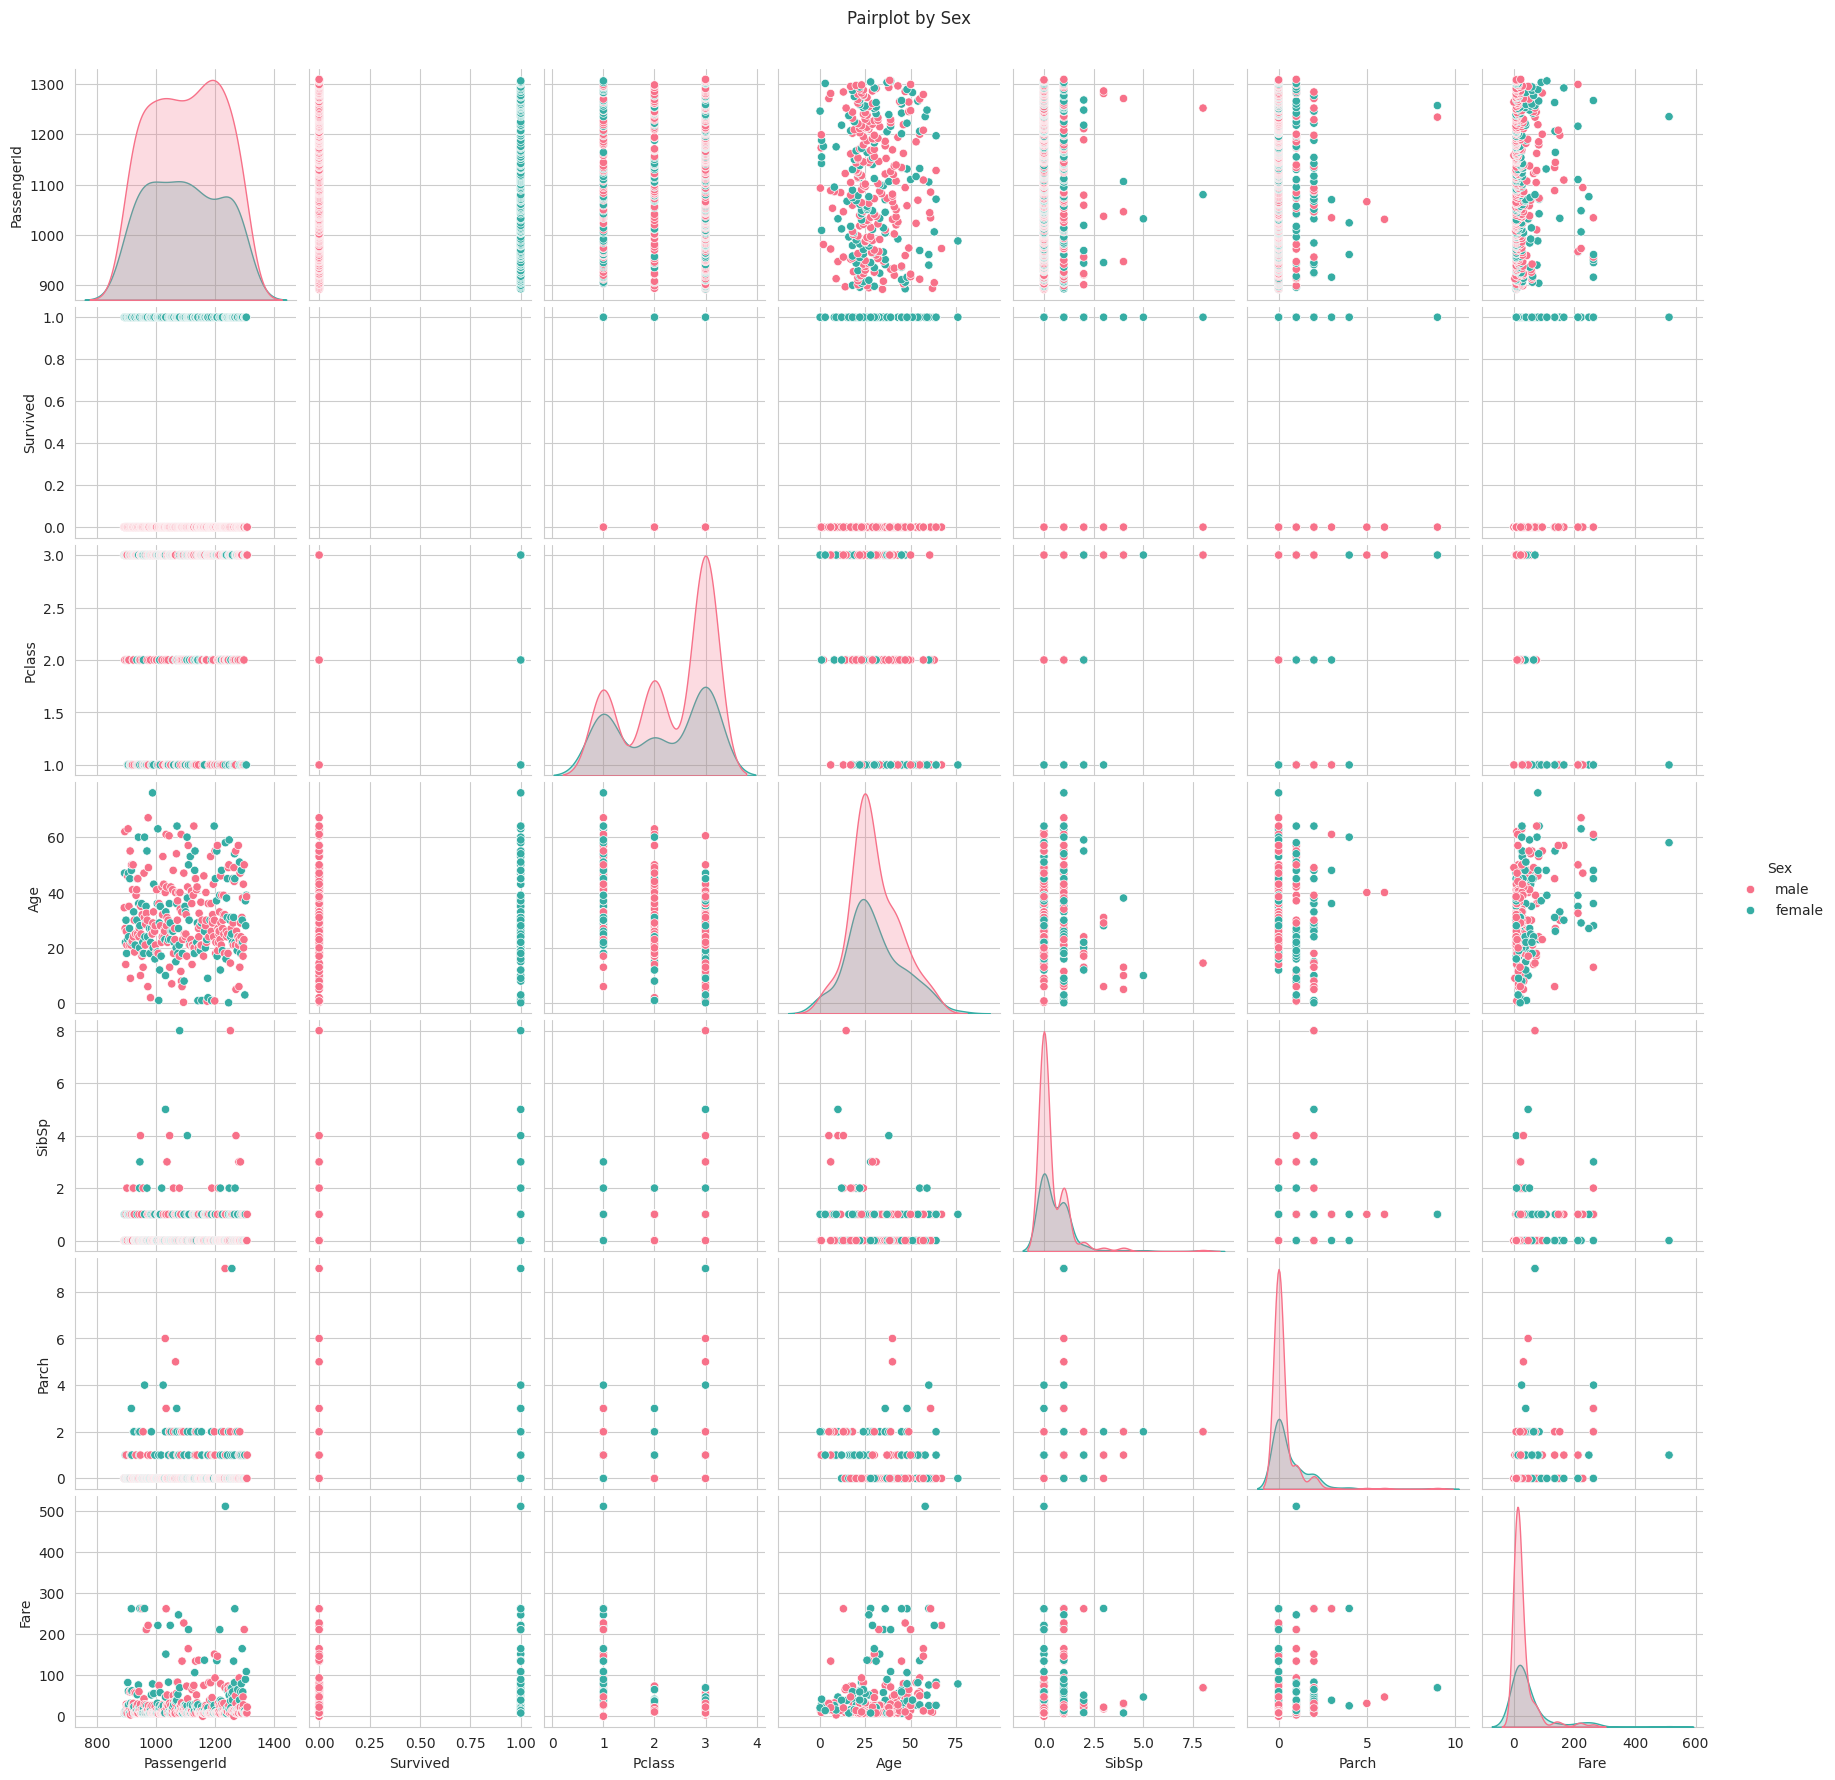

In [10]:
# Pairplot with hue based on sex
sns.pairplot(dataframe, hue='Sex', palette='husl')
plt.suptitle('Pairplot by Sex', y=1.02)
plt.show()


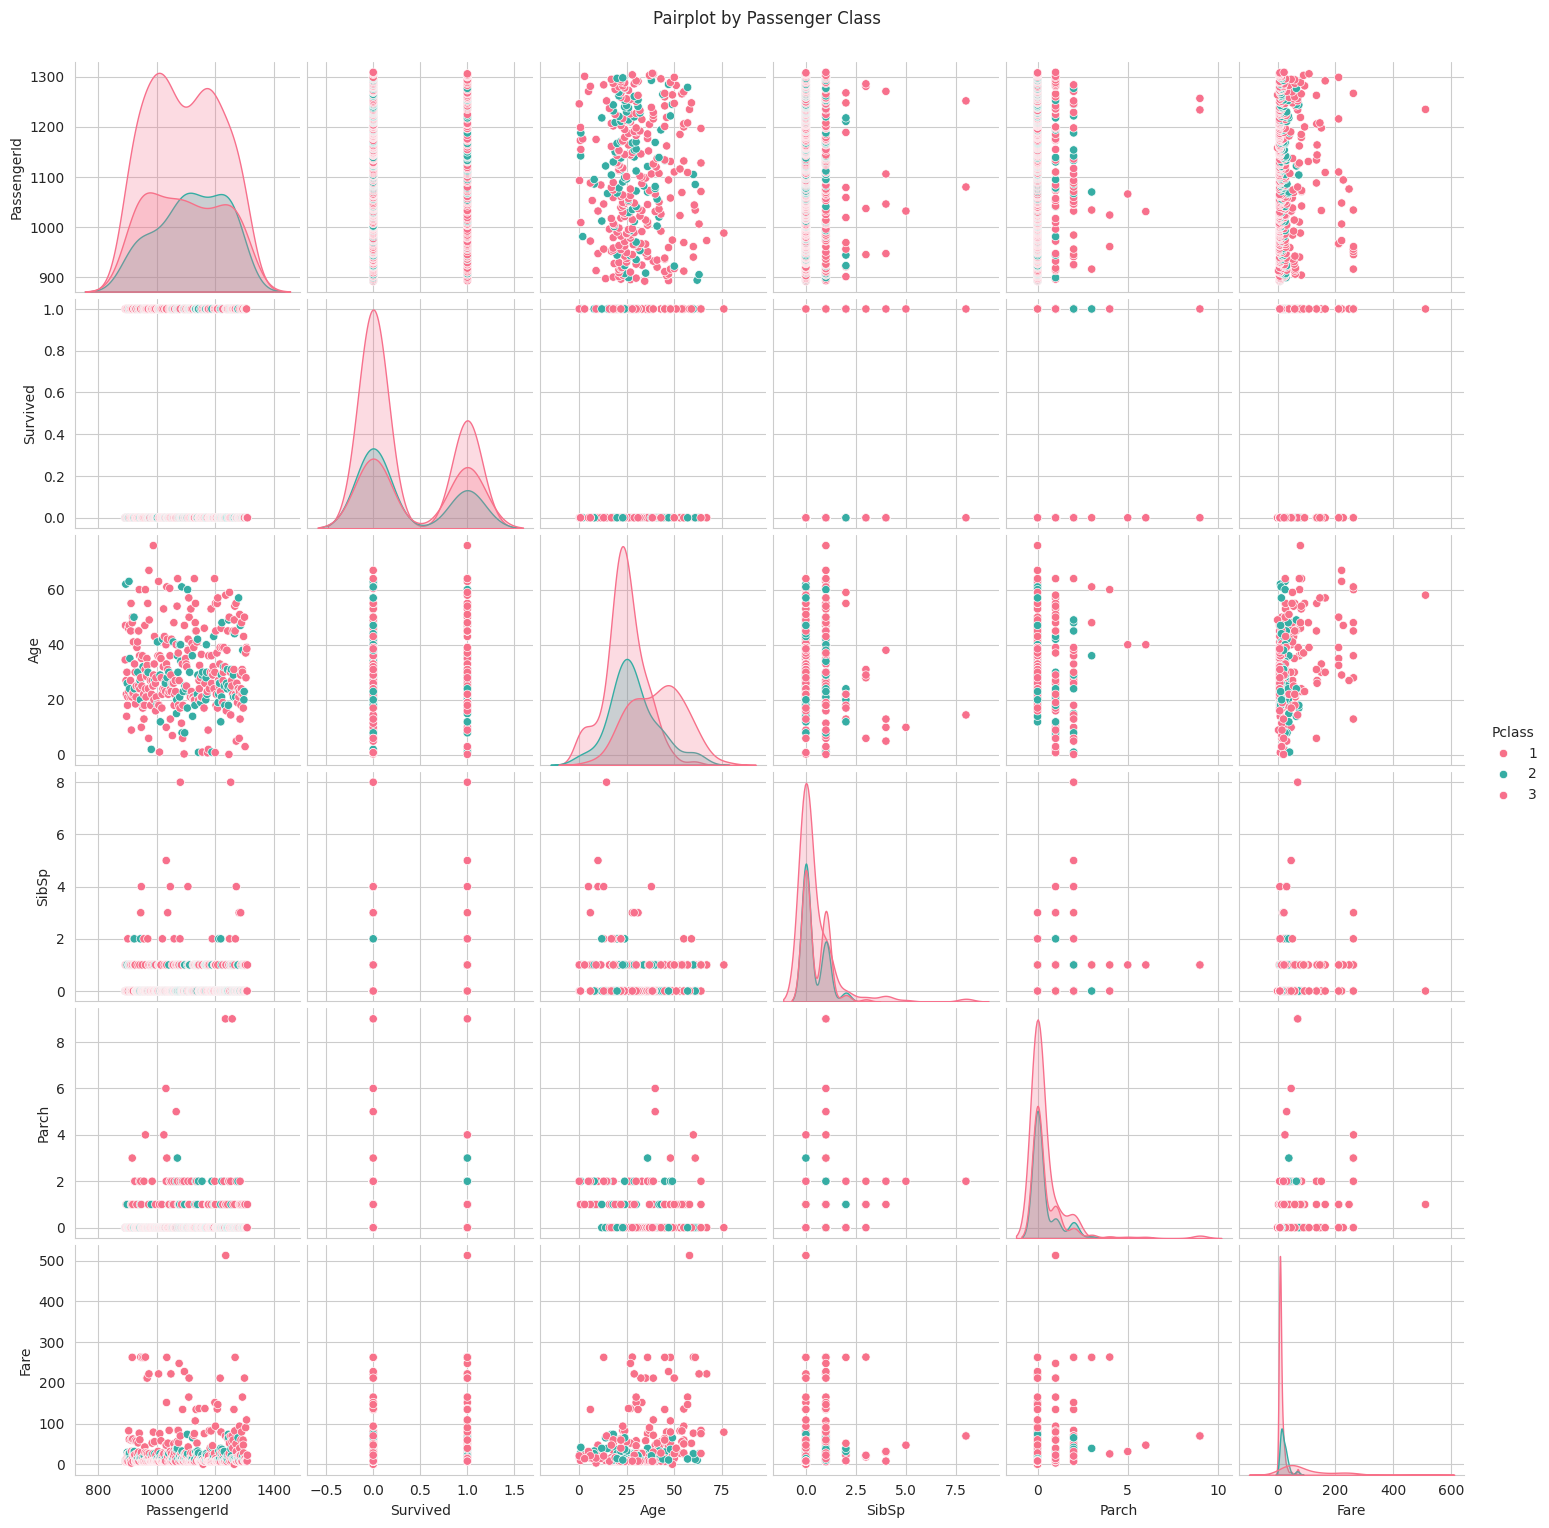

In [11]:
# Pairplot with hue based on passenger class
sns.pairplot(dataframe, hue='Pclass', palette='husl')
plt.suptitle('Pairplot by Passenger Class', y=1.02)
plt.show()


In [12]:
# Display the count of missing values
dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

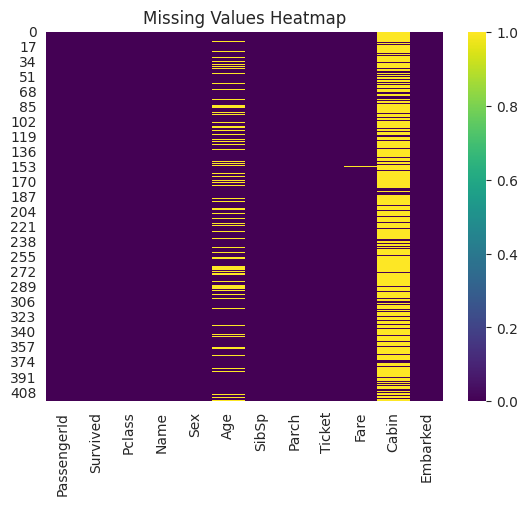

In [13]:
# Heatmap of missing values
sns.heatmap(dataframe.isnull(), cmap='viridis', cbar=True)
plt.title('Missing Values Heatmap')
plt.show()

In [14]:
# Dropping the 'Cabin' column due to excessive missing values
dataframe.drop(columns=['Cabin'], axis=1, inplace=True)

In [15]:
# Function to fill missing age values
def fill_age(columns):
    age = columns[0]
    pclass = columns[1]

    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [16]:
# Applying the age filling function
dataframe['Age'] = dataframe[['Age', 'Pclass']].apply(fill_age, axis=1)

In [17]:

# Filling missing fare values with the mean
dataframe['Fare'] = dataframe['Fare'].fillna(dataframe['Fare'].mean())

In [18]:
# Checking for any remaining missing values
dataframe.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

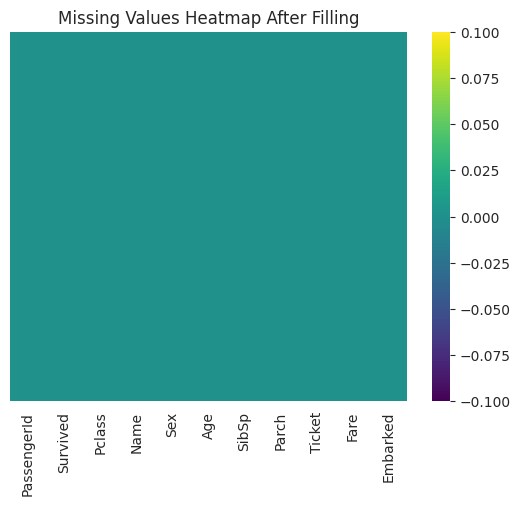

In [19]:
# Heatmap of missing values after filling
sns.heatmap(dataframe.isnull(), yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap After Filling')
plt.show()

In [20]:
# Dropping unnecessary columns
dataframe.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [21]:
# Display the cleaned dataframe
dataframe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [22]:

# One-hot encoding categorical variables
df_encoded = pd.get_dummies(dataframe, columns=['Sex', 'Embarked'])

In [23]:
# Ensuring the columns are integers
df_encoded['Sex_female'] = df_encoded['Sex_female'].astype(int)
df_encoded['Sex_male'] = df_encoded['Sex_male'].astype(int)
df_encoded['Embarked_C'] = df_encoded['Embarked_C'].astype(int)
df_encoded['Embarked_Q'] = df_encoded['Embarked_Q'].astype(int)
df_encoded['Embarked_S'] = df_encoded['Embarked_S'].astype(int)

In [24]:
# Display the encoded dataframe
df_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,0,1,0,1,0
1,1,3,47.0,1,0,7.0000,1,0,0,0,1
2,0,2,62.0,0,0,9.6875,0,1,0,1,0
3,0,3,27.0,0,0,8.6625,0,1,0,0,1
4,1,3,22.0,1,1,12.2875,1,0,0,0,1


In [25]:
# Display the columns of the encoded dataframe
df_encoded.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [26]:
# Splitting the data into features and target variable
features = df_encoded[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
target = df_encoded['Survived']

In [27]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [28]:
# Initializing the Support Vector Classifier with RBF kernel
svc_model = SVC(kernel='rbf')

In [29]:
# Training the model
svc_model.fit(X_train, y_train)

SVC()

In [30]:
# Making predictions on the test set
predictions = svc_model.predict(X_test)

In [31]:

# Printing the accuracy score
print("Accuracy of Titanic Dataset using SVC = ", accuracy_score(y_test, predictions))

Accuracy of Titanic Dataset using SVC =  0.6811594202898551


In [32]:

# Printing the classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.99      0.81        92
           1       0.75      0.07      0.12        46

    accuracy                           0.68       138
   macro avg       0.71      0.53      0.46       138
weighted avg       0.70      0.68      0.58       138



In [33]:
# Printing the confusion matrix
print(confusion_matrix(y_test, predictions))

[[91  1]
 [43  3]]


In [34]:
import pickle

# Save the model
with open('svc_model.pkl', 'wb') as model_file:
    pickle.dump(svc_model, model_file)


In [35]:
import json
import pandas as pd
import pickle
from sklearn.svm import SVC

# Load the model
model_path = '/content/svc_model.pkl'
with open(model_path, 'rb') as model_file:
    model = pickle.load(model_file)

def handler(event, context):
    try:
        data = json.loads(event['body'])
        df = pd.DataFrame(data, index=[0])

        # Ensure the input features are in the correct order
        features = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
                       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

        prediction = model.predict(features)
        result = 'Survived' if prediction[0] == 1 else 'Did not survive'

        return {
            'statusCode': 200,
            'body': json.dumps({'prediction': result})
        }
    except Exception as e:
        return {
            'statusCode': 500,
            'body': json.dumps({'error': str(e)})
        }


In [37]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 9.6

In [38]:
import gradio as gr
import pickle
import pandas as pd

# Load the model
with open('svc_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Define the prediction function
def predict_survival(Pclass, Age, SibSp, Parch, Fare, Sex, Embarked):
    # Create a dataframe from the input
    input_data = pd.DataFrame({
        'Pclass': [Pclass],
        'Age': [Age],
        'SibSp': [SibSp],
        'Parch': [Parch],
        'Fare': [Fare],
        'Sex_female': [1 if Sex == 'female' else 0],
        'Sex_male': [1 if Sex == 'male' else 0],
        'Embarked_C': [1 if Embarked == 'C' else 0],
        'Embarked_Q': [1 if Embarked == 'Q' else 0],
        'Embarked_S': [1 if Embarked == 'S' else 0]
    })

    # Make a prediction
    prediction = model.predict(input_data)
    result = 'Survived' if prediction[0] == 1 else 'Did not survive'
    return result

# Define the input components
input_components = [
    gr.Dropdown(choices=['1', '2', '3'], label="Pclass"),
    gr.Number(label="Age"),
    gr.Number(label="SibSp"),
    gr.Number(label="Parch"),
    gr.Number(label="Fare"),
    gr.Radio(choices=['male', 'female'], label="Sex"),
    gr.Radio(choices=['C', 'Q', 'S'], label="Embarked")
]

# Define the output component
output_component = gr.Textbox(label="Prediction")

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_survival,
    inputs=input_components,
    outputs=output_component,
    title="Titanic Survival Prediction",
    description="Enter passenger details to predict survival on the Titanic."
)

# Launch the interface
interface.launch(share=True)



Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://61de4c846e3a6116bb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
